In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from tabulate import tabulate

C:\Users\Jhirs\AppData\Local\Temp\ipykernel_5616\3386311384.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
names = ['Sex', 'Length (mm)', 'Diameter (mm)', 'Height (mm)', 'Whole Weight (g)',
                'Shucked Weight (g)', 'Viscera Weight (g)', 'Shell Weight (g)', 'Rings']
df = pd.read_csv("https://raw.githubusercontent.com/fundamentals-of-data-science/datasets/master/abalone.original.csv", names=names)

Now we turn to pairwise analysis of each variable with the target variable, Rings. We will start by comparing Sex against Rings.  Since we are comparing a categorical variable Sex against the Numeric Rings, we can consider the descriptive statistics for Rings for each of the 3 values of Sex. We expect that infants have a lower number of rings than males or females:

In [35]:
by_sex = df.groupby('Sex')
rings_by_sex = by_sex['Rings'].describe()
rings_by_sex

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,1307.0,11.129304,3.104256,5.0,9.0,10.0,12.0,29.0
I,1342.0,7.890462,2.511554,1.0,6.0,8.0,9.0,21.0
M,1528.0,10.705497,3.026349,3.0,9.0,10.0,12.0,27.0


We see that infants have a mean ring count of about 8, while females and males have about the same mean, 11. Infants also have a lower median at 8 compared with 10 for both females and males, and overall have lower values in their statistics than females or males. 

We can visualize the differences in the distributions of rings by sex by small multiples. Let's see how each sex compares:

[15  7 10 ... 10  9 12]
[ 9 20 16 ...  8 11 10]
[ 7  8  7 ...  7  7 10]


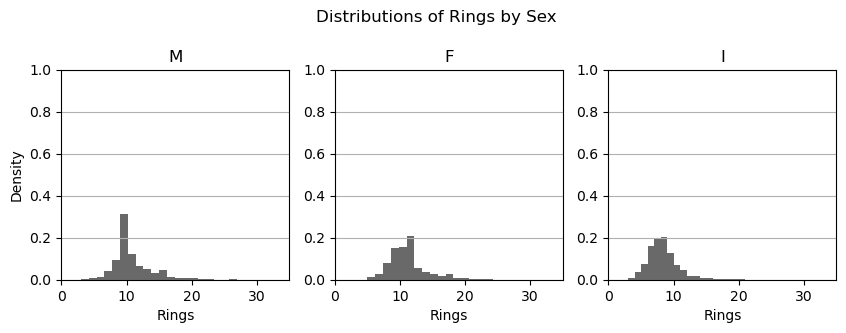

In [45]:
labels = pd.unique(df['Sex'].values)

figure = plt.figure(figsize=(10,6))
figure.suptitle('Distributions of Rings by Sex')
for i, x in enumerate(labels):
    axes = figure.add_subplot(2, 3, i+1)
    subdata = by_sex['Rings'].get_group(x).values
    print(subdata)
    axes.hist(subdata, bins=20, color='dimgray', density=True)
    axes.set_title(x)
    axes.set_ylim((0, 1))
    axes.set_xlim((0, 35))
    axes.set_xlabel('Rings')
    axes.grid(axis='y')
    if (i % 3 == 0):
        axes.set_ylabel('Density')
        
plt.show()
plt.close()

We see fairly symmetric distribution in each case, with a large spike for males around 10 rings. Females have the highest proportion closer to 11-12 rings, while infants tend a bit lower around 9-10 rings. From our descriptive statistics, we saw the max value for females was the highest, at 29 rings, followed closely by males at 27 and infants at 21. It seems that on average, females live longer than males, and infants live shorter than males and females (hence why they are infants). 

According to the government of Western Australia, abalone have a high mortality rate as infants and larvae, but while fully mature abalone are not as in much danger to predators - this might help explain why infant abalone do not live as long and do not have as many rings as adults.

https://www.fish.wa.gov.au/Documents/recreational_fishing/fact_sheets/fact_sheet_abalone.pdf

Next we can look at Length vs Rings. Since these are both numerical variables and we've already looked at the descriptive statistics individually, we can calculate the Pearson correlation coefficient and the Spearman correlation coefficient:

In [46]:
print('r = ', stats.pearsonr(df['Length (mm)'], df['Rings'])[0])
print('rho = ', stats.spearmanr(df['Length (mm)'], df['Rings'])[0])

r =  0.556719576929618
rho =  0.6043853354046326


We do see a fairly strong correlation between Length and Rings. Our R value of 0.57 tells us how linearly related these two variables are, while our Rho of 0.60 tells us the degree of monotonicity between Length and Rings. We see a fairly strong positive correlation here, and so it would appear that as Length of an abalone increases, so does the number of Rings it has.

Now we can visualize this relationship with a scatter plot:

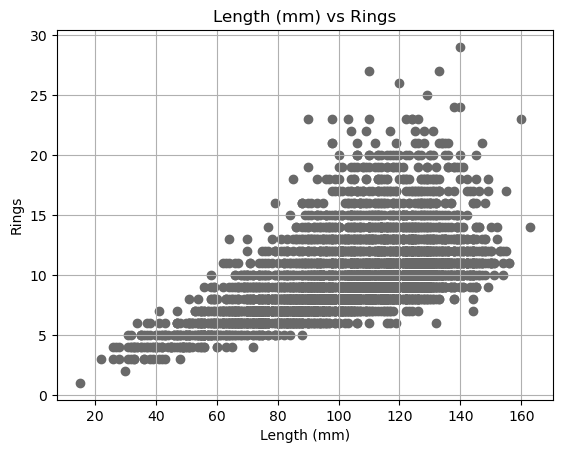

In [48]:
plt.scatter(df['Length (mm)'], df['Rings'], color='dimgray')
plt.title('Length (mm) vs Rings')
plt.xlabel('Length (mm)')
plt.ylabel('Rings')

plt.grid(axis='x')
plt.grid(axis='y')

plt.show()
plt.close()

This plot is a bit hard to see since there are so many data points, but I think the main point comes across: longer abalone typically have more rings than shorter abalone. That is to say, the age of an abalone is affected by how long it is - it can be reasonably described as a relatively positive linear relationship.

Now we move on to Diameter vs Rings. Since we know from our single variable EDA that Diameter seems to have a proportional relationship to Length, I predict we will again see that as Diameter increases, so do the number of Rings - they will be positively correlated and have a fairly strong correlation. Let's start with the Pearson's and Spearman's correlation coefficients:

In [49]:
print('r = ', stats.pearsonr(df['Diameter (mm)'], df['Rings'])[0])
print('rho = ', stats.spearmanr(df['Diameter (mm)'], df['Rings'])[0])

r =  0.5746598513059193
rho =  0.6228950050921535


Similar to Length, we see that Diameter has a fairly strong correlation with Rings, with an R value of 0.57 and Rho of 0.62. Since both size parameters are related to each other (or so we assume), it makes sense that they have a similar relationship to Rings.

Let's try another scatter plot to get a good idea of the relationship:

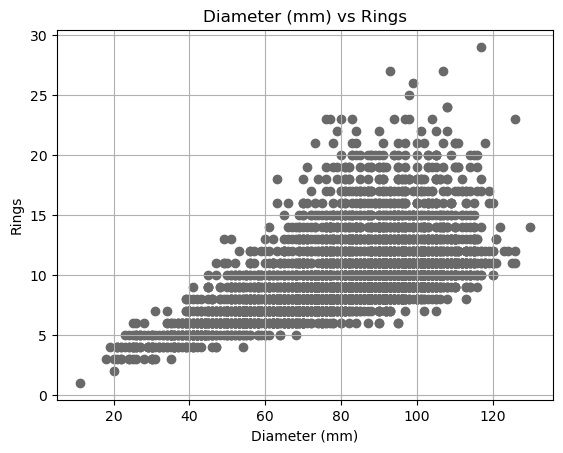

In [50]:
plt.scatter(df['Diameter (mm)'], df['Rings'], color='dimgray')
plt.title('Diameter (mm) vs Rings')
plt.xlabel('Diameter (mm)')
plt.ylabel('Rings')

plt.grid(axis='x')
plt.grid(axis='y')

plt.show()
plt.close()

Again we see a similar plot as Length vs Rings. As Diameter increases, so too does Rings. We can surmise that older abalone are in general larger (and therefore have a larger diameter) than younger abalone. There doesn't seem to be a consensus online whether abalone stop growing after a certain age/point, and instead their growth may be more closely determined by other factors like food availability and temperature of their environments. However, I would think it interesting to look at the limits on whether there is a point their shells get too big to live in (similar to lobsters' shells).

Next we turn our attention to Height vs Rings. Again this is a measurement of size, and so I think we will see the same pattern we've seen for Length and Diameter against Rings - a strong correlation between the two variables. Once again we look at the correlation coefficients:

In [51]:
print('r = ', stats.pearsonr(df['Height (mm)'], df['Rings'])[0])
print('rho = ', stats.spearmanr(df['Height (mm)'], df['Rings'])[0])

r =  0.5574673244580376
rho =  0.6577163709860909


We see an R value of 0.56, and a Rho of 0.66, meaning again we have a strong correlation here, this time between Height and Rings. It would make sense that older abalone are not only longer than younger abalone, but are 'taller' too.

Again we will create a scatter plot, and should expect to see a familiar shape, as we've seen with the last 2 pairwise relationships:

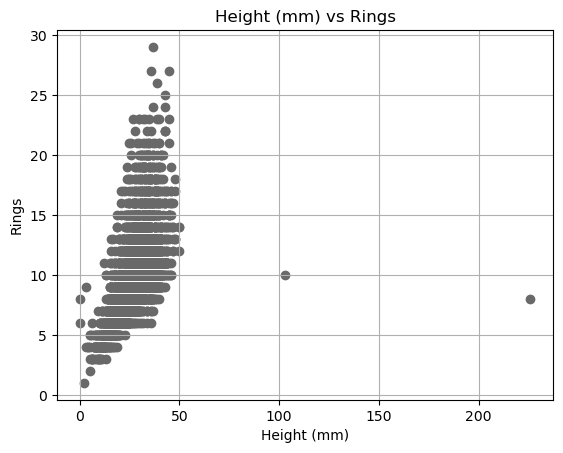

In [52]:
plt.scatter(df['Height (mm)'], df['Rings'], color='dimgray')
plt.title('Height (mm) vs Rings')
plt.xlabel('Height (mm)')
plt.ylabel('Rings')

plt.grid(axis='x')
plt.grid(axis='y')

plt.show()
plt.close()

Remember from our single variable EDA that our median for Height was 28mm, and our 3rd quartile only 33mm. The oldest abalone generally fall into this range, while the extreme values for height are actually much closer to the mean/median for Rings (10 and 9, respectively). There is still a strong positive relationship despite this, as we can see that the abalone with Ring counts between 20-30 are still generally taller, around 40mm-50mm, than younger abalone.

Next we turn to Whole Weight vs Rings. Again we have 2 numerical variables, so we can easily compare these variables to each other with correlation coefficients as well as a scatter plot. I hypothesize we will once again see a positive correlation here - because in general larger abalone should weight more, and thus have more Rings (as we've seen in our pairwise EDA so far).

In [3]:
print('r = ', stats.pearsonr(df['Whole Weight (g)'], df['Rings'])[0])
print('rho = ', stats.spearmanr(df['Whole Weight (g)'], df['Rings'])[0])

r =  0.5403896769239007
rho =  0.6308319554663986


We do see that we have a fairly strong correlation between Whole Weight and Rings. It would be interesting to look at the relationships between weight and some of the size parameters, but we will focus on our target variable Rings for now. Let's see the scatter plot:

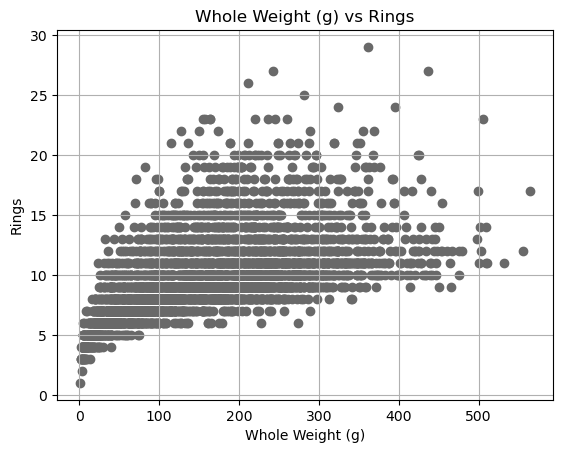

In [4]:
plt.scatter(df['Whole Weight (g)'], df['Rings'], color='dimgray')
plt.title('Whole Weight (g) vs Rings')
plt.xlabel('Whole Weight (g)')
plt.ylabel('Rings')

plt.grid(axis='x')
plt.grid(axis='y')

plt.show()
plt.close()

We see a little more variability here than we do for say Diameter. Remember for Whole Weight, our min was 0.4g but the max was 565.1g. The heaviest abalone such as above 500g have an age closer to our 3rd quartile for Rings, 11. The oldest abalone still are heavy around 250g-450g, but similar to Diameter, the heaviest ones are not the oldest, as one might theorize before looking at the plot. 

We move on to Shucked Weight vs Rings. I think we will see the same pattern for most if not all of the weight variables - a strong positive correlationship. Here are the summary statistics:

In [5]:
print('r = ', stats.pearsonr(df['Shucked Weight (g)'], df['Rings'])[0])
print('rho = ', stats.spearmanr(df['Shucked Weight (g)'], df['Rings'])[0])

r =  0.42088365794521454
rho =  0.5394199820834579


Shucked weight does not in fact have as much of a correlation to Rings as Whole Weight. Shucked weight is the weight of an abalone without its shell, so it could be that the Shell Weight makes up for an abalone's lower Shucked Weight when we consider its age. Again we will focus on the target variable, but I do wonder if Shucked Weight and Shell Weight have a high correlation with each other or not. Questions to explore in free time.

Here we have a simple scatter plot:

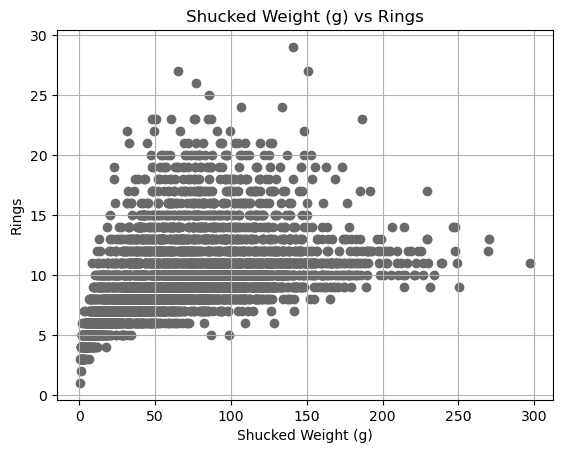

In [6]:
plt.scatter(df['Shucked Weight (g)'], df['Rings'], color='dimgray')
plt.title('Shucked Weight (g) vs Rings')
plt.xlabel('Shucked Weight (g)')
plt.ylabel('Rings')

plt.grid(axis='x')
plt.grid(axis='y')

plt.show()
plt.close()

We see a fairly similar plot as in Whole Weight vs Rings, although some of the older abalone only have a Shucked Weight around 50g-100g. However, we do see the heaviest abalone by Shucked Weight have again between 10-15 Rings, close to the 3rd quartile for Rings. This leads me to believe there is an advantage in living longer the more an abalone weighs, but only up to a certain limit.

To note: Up until now, most of the scatter plots we've seen have had so many data points with similar values on the Y axis, we are left with a fairly noisy plot, which could make it more difficult to distinguish patterns in the data. We could add some jitter or perform other techniques to make the plots a bit easier to read, but I think for the purposes of this analysis, combined with viewing correlation coefficients, the normal scatter plots are enough to get an idea of the pairwise relationships we see.

Next we will focus on Viscera Weight vs Rings. Again we can look at how Viscera Weight is correlated with Rings. I predict there will not be as much correlation here as we've seen with previous pairwise variables - Viscera Weight is not as varied as Shucked or Whole Weight.

In [7]:
print('r = ', stats.pearsonr(df['Viscera Weight (g)'], df['Rings'])[0])
print('rho = ', stats.spearmanr(df['Viscera Weight (g)'], df['Rings'])[0])

r =  0.5038192487597715
rho =  0.6143438123140512


We see it does actually have a higher correlation to Rings than Shucked Weight. That must be some heavy viscera! It makes sense that abalone with more viscera are older, since they would have to be larger, and as we know, larger abalone tend to be older. We can confirm this with a scatter plot:

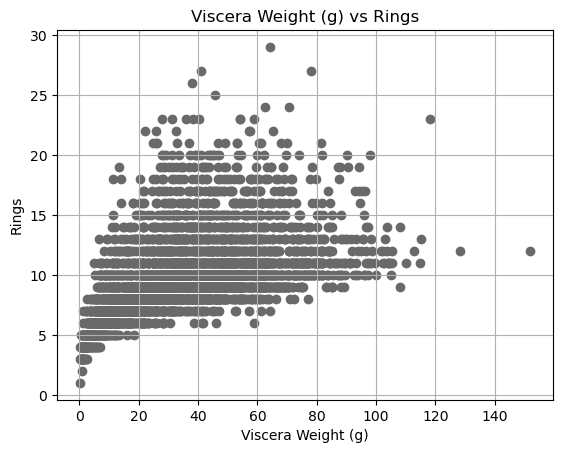

In [8]:
plt.scatter(df['Viscera Weight (g)'], df['Rings'], color='dimgray')
plt.title('Viscera Weight (g) vs Rings')
plt.xlabel('Viscera Weight (g)')
plt.ylabel('Rings')

plt.grid(axis='x')
plt.grid(axis='y')

plt.show()
plt.close()

Similar to what we've seen with the other weight categories, there isn't too much else to add here - the abalone with the heaviest viscera tend towards the 3rd quartile. We could consider looking at a boxplot as well, but I will try to keep the notebook short, for the sake of time. 

Finally we have Shell Weight vs Rings. Since we already looked at Shucked Weight and saw a strong positive correlation to Rings, we would expect Shell Weight to look very similar. After all, larger abalone shucks should proportionally have a similar sized shell no? Here are the correlation coefficients:

In [9]:
print('r = ', stats.pearsonr(df['Shell Weight (g)'], df['Rings'])[0])
print('rho = ', stats.spearmanr(df['Shell Weight (g)'], df['Rings'])[0])

r =  0.6275740445103217
rho =  0.6924745607793563


We see a relatively very strong correlationship, when compared to some of the other categories we've seen so far, with a pearson r of 0.63 and a spearman r of about 0.69. This makes sense when we think that as abalone age, they continue to grow, and thus their shells grow with them. We can look at one last scatter plot as well:

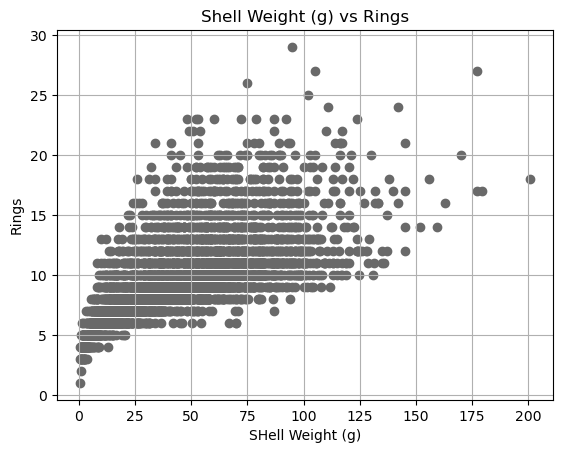

In [10]:
plt.scatter(df['Shell Weight (g)'], df['Rings'], color='dimgray')
plt.title('Shell Weight (g) vs Rings')
plt.xlabel('SHell Weight (g)')
plt.ylabel('Rings')

plt.grid(axis='x')
plt.grid(axis='y')

plt.show()
plt.close()

Unlike the other weight variables, we see the heaviest abalone shell has a bit more Rings than just toward the 3rd quartile - closer to 17 in fact. We see that some of the heaviest shelled abalone do have a lot of Rings - 15+. 